# Hypotheses Testing

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading data
df = pd.read_csv("../data/clean/clean_dataset.csv",sep=";",encoding="utf-8")

In [3]:
df.shape

(103904, 24)

### H1 — Service quality differs between satisfied vs dissatisfied

What we test is that is average service score significantly different between satisfied and dissatisfied passengers?

Example with **Seat comfort**:

H₀: Mean Seat comfort is the same for satisfied and not satisfied passengers.

H₁: Mean Seat comfort is different (or higher for satisfied passengers).

In [4]:
df_h1 = df.copy()

In [10]:
df_h1["satisfaction"].value_counts(dropna=False)

satisfaction
Neutral Or Dissatisfied    58879
Satisfied                  45025
Name: count, dtype: int64

In [11]:
#Creating 2 comparison groups
df_h1["sat_bin"] = (
    df_h1["satisfaction"]
    .astype(str)
    .str.strip()
    .str.lower()
    .apply(lambda x: "Satisfied" if x == "satisfied" else "Not satisfied")
)

In [12]:
df_h1["sat_bin"].value_counts()

sat_bin
Not satisfied    58879
Satisfied        45025
Name: count, dtype: int64

In [13]:
# Extract the two groups
feature = "seat_comfort"

group_sat = df_h1[df_h1["sat_bin"] == "Satisfied"][feature].dropna()
group_not = df_h1[df_h1["sat_bin"] == "Not satisfied"][feature].dropna()

In [14]:
group_sat.mean(), group_not.mean()

(np.float64(3.966529705719045), np.float64(3.0362947740280917))

In [15]:
#T-test
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(group_sat, group_not, equal_var=False)
t_stat, p_value


(np.float64(122.34524856369318), np.float64(0.0))

In [16]:
import numpy as np

def cohens_d(x, y):
    nx, ny = len(x), len(y)
    vx, vy = np.var(x, ddof=1), np.var(y, ddof=1)
    pooled_std = np.sqrt(((nx-1)*vx + (ny-1)*vy) / (nx+ny-2))
    return (np.mean(x) - np.mean(y)) / pooled_std

d = cohens_d(group_sat, group_not)
d


np.float64(0.7526615276655118)

C:\Users\ghaza\AppData\Local\Temp\ipykernel_10792\828018903.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


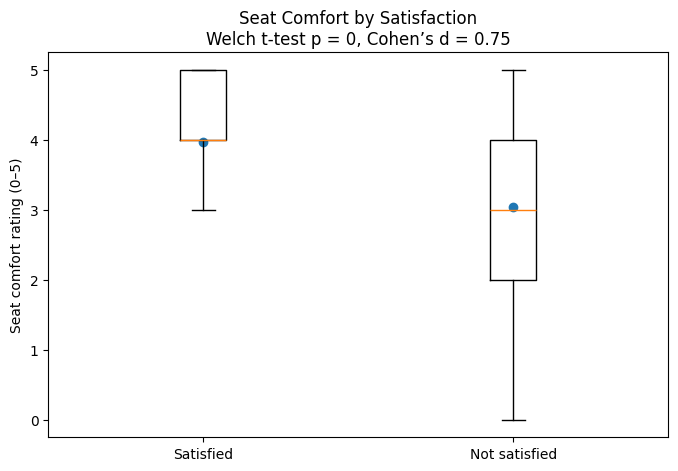

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.boxplot(
    [group_sat, group_not],
    labels=["Satisfied", "Not satisfied"],
    showfliers=False
)

plt.scatter([1, 2], [group_sat.mean(), group_not.mean()])

plt.title(
    f"Seat Comfort by Satisfaction\n"
    f"Welch t-test p = {p_value:.3g}, Cohen’s d = {d:.2f}"
)
plt.ylabel("Seat comfort rating (0–5)")
plt.show()


**Statistical conclusion**

The Welch two-sample t-test shows a statistically significant difference in seat comfort ratings between satisfied and dissatisfied passengers (p < 0.001), meaning this difference is very unlikely to be due to chance. The effect size (Cohen’s d = 0.75) is medium-to-large, indicating that the difference is not only statistically significant but also meaningful in practice.

Business interpretation

Seat comfort plays an important role in how passengers feel about their overall flight experience. Satisfied passengers rate seat comfort almost one point higher on a five-point scale compared to dissatisfied passengers. This suggests that improving seat comfort can have a noticeable and positive impact on overall passenger satisfaction.

Example with **Inflight entertainment**:

H₀: Mean Seat comfort is the same for satisfied and not satisfied passengers.

H₁: Mean Seat comfort is different (or higher for satisfied passengers).

In [20]:
df_h1_ie = df.copy()

In [21]:
df_h1_ie["sat_bin"] = (
    df_h1_ie["satisfaction"]
    .astype(str)
    .str.strip()
    .str.lower()
    .apply(lambda x: "Satisfied" if x == "satisfied" else "Not satisfied")
)


In [22]:
df_h1_ie["sat_bin"].value_counts()


sat_bin
Not satisfied    58879
Satisfied        45025
Name: count, dtype: int64

In [23]:
# Extract the two groups
feature = "inflight_entertainment"

group_sat = df_h1_ie[df_h1_ie["sat_bin"] == "Satisfied"][feature].dropna()
group_not = df_h1_ie[df_h1_ie["sat_bin"] == "Not satisfied"][feature].dropna()

group_sat.mean(), group_not.mean()


(np.float64(3.964930594114381), np.float64(2.894155811070161))

In [24]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(group_sat, group_not, equal_var=False)
t_stat, p_value


(np.float64(143.71477497446338), np.float64(0.0))

In [25]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(group_sat, group_not, equal_var=False)
t_stat, p_value


(np.float64(143.71477497446338), np.float64(0.0))

C:\Users\ghaza\AppData\Local\Temp\ipykernel_10792\818447346.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


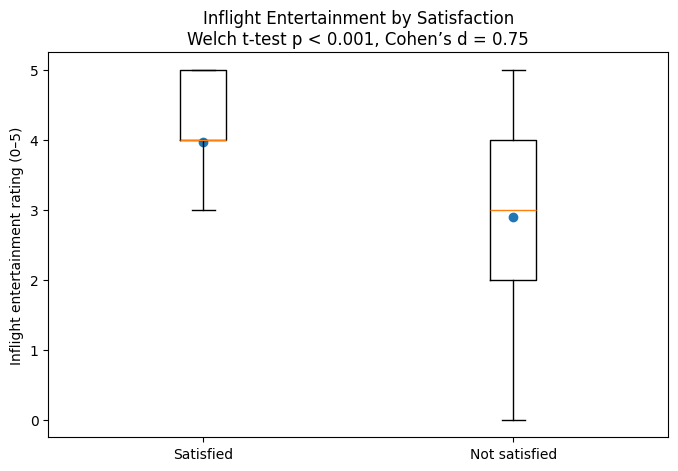

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.boxplot(
    [group_sat, group_not],
    labels=["Satisfied", "Not satisfied"],
    showfliers=False
)

plt.scatter([1, 2], [group_sat.mean(), group_not.mean()])

plt.title(
    f"Inflight Entertainment by Satisfaction\n"
    f"Welch t-test p < 0.001, Cohen’s d = {d:.2f}"
)
plt.ylabel("Inflight entertainment rating (0–5)")
plt.show()


**Statistical conclusion**

Inflight entertainment ratings differ significantly between satisfied and dissatisfied passengers (Welch t-test, p < 0.001), with a medium-to-large effect size (Cohen’s d ≈ 0.75).

**Business interpretation**

Satisfied passengers rate inflight entertainment about one point higher than dissatisfied passengers. This shows that inflight entertainment is a key contributor to overall satisfaction and a strong lever for improving the passenger experience.

### H2 — High service quality can offset the negative impact of delays

H₀:
Among delayed flights, passenger satisfaction does not differ by service quality level.

H₁:
Among delayed flights, passengers with higher service quality report higher satisfaction.

In [29]:
df_h2 = df.copy()

In [31]:
# Keep only delayed flights
df_h2 = df_h2[df_h2["arrival_delay_in_minutes"] > 15]

In [33]:
# a simple service quality index - key services have been aggregated .
service_cols = [
    "seat_comfort",
    "inflight_entertainment",
    "on-board_service"
]

df_h2["service_avg"] = df_h2[service_cols].mean(axis=1)


In [34]:
# Split into High vs Low service quality
median_service = df_h2["service_avg"].median()

df_h2["service_level"] = df_h2["service_avg"].apply(
    lambda x: "High service" if x >= median_service else "Low service"
)

In [35]:
df_h2["service_level"].value_counts()

service_level
High service    13098
Low service     10673
Name: count, dtype: int64

In [36]:
# satisfaction as binary
df_h2["sat_bin"] = (
    df_h2["satisfaction"]
    .astype(str)
    .str.strip()
    .str.lower()
    .apply(lambda x: "Satisfied" if x == "satisfied" else "Not satisfied")
)


In [37]:
# Comparing satisfaction rates
pd.crosstab(
    df_h2["service_level"],
    df_h2["sat_bin"],
    normalize="index"
)


sat_bin,Not satisfied,Satisfied
service_level,,
High service,0.463735,0.536265
Low service,0.865923,0.134077


In [38]:
from scipy.stats import chi2_contingency

table = pd.crosstab(df_h2["service_level"], df_h2["sat_bin"])

chi2, p_value, dof, expected = chi2_contingency(table)
chi2, p_value


(np.float64(4149.115288927928), np.float64(0.0))

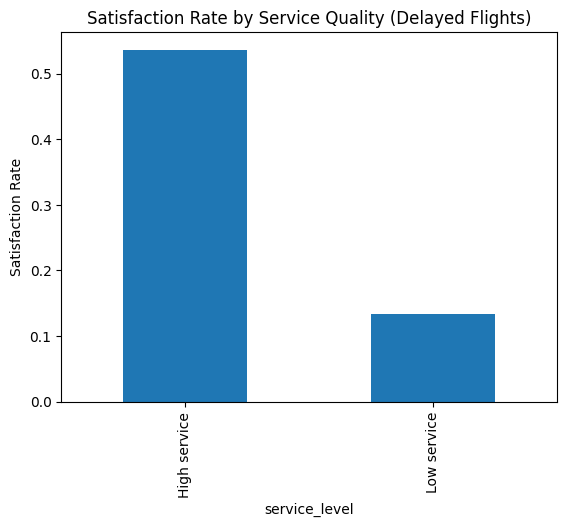

In [39]:
satisfaction_rate = (
    df_h2[df_h2["sat_bin"] == "Satisfied"]
    .groupby("service_level")
    .size()
    / df_h2.groupby("service_level").size()
)

satisfaction_rate.plot(kind="bar")
plt.title("Satisfaction Rate by Service Quality (Delayed Flights)")
plt.ylabel("Satisfaction Rate")
plt.show()

**Statistical conclusion**

Among delayed flights, satisfaction differs significantly between passengers receiving high and low service quality (chi-square test, p < 0.001).

**Business interpretation**

Even when flights are delayed, passengers who receive high-quality service are much more likely to be satisfied. This shows that good service can partially offset the negative impact of delays and helps airlines protect customer satisfaction during disruptions.

### H3 — Different passenger segments value different things

H₀: Passenger satisfaction is independent of the type of travel.

H₁: Passenger satisfaction is associated with the type of travel.

In [40]:
df_h3 = df.copy()

In [41]:
df_h3["sat_bin"] = (
    df_h3["satisfaction"]
    .astype(str)
    .str.strip()
    .str.lower()
    .apply(lambda x: "Satisfied" if x == "satisfied" else "Not satisfied")
)


In [42]:
df_h3["type_of_travel"].value_counts()

type_of_travel
Business Travel    71655
Personal Travel    32249
Name: count, dtype: int64

In [45]:
# Comparing satisfaction rates by segment
pd.crosstab(
    df_h3["type_of_travel"],
    df_h3["sat_bin"],
    normalize="index"
)


sat_bin,Not satisfied,Satisfied
type_of_travel,,
Business Travel,0.417403,0.582597
Personal Travel,0.898322,0.101678


In [46]:
from scipy.stats import chi2_contingency

table = pd.crosstab(df_h3["type_of_travel"], df_h3["sat_bin"])

chi2, p_value, dof, expected = chi2_contingency(table)
chi2, p_value


(np.float64(20945.233826061667), np.float64(0.0))

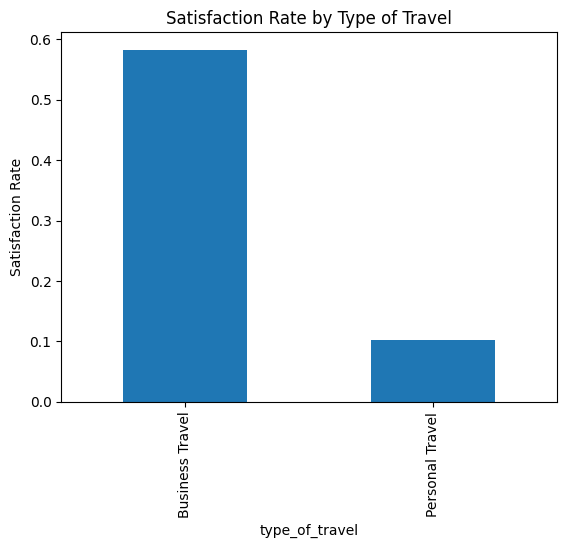

In [47]:
satisfaction_rate = (
    df_h3[df_h3["sat_bin"] == "Satisfied"]
    .groupby("type_of_travel")
    .size()
    / df_h3.groupby("type_of_travel").size()
)

satisfaction_rate.plot(kind="bar")
plt.title("Satisfaction Rate by Type of Travel")
plt.ylabel("Satisfaction Rate")
plt.show()


**Statistical conclusion**

Passenger satisfaction differs significantly between business and personal travelers (chi-square test, p < 0.001).

**Business interpretation**

Business travelers are much more likely to be satisfied than personal travelers. This suggests that expectations, priorities, and service needs differ strongly by travel purpose, reinforcing that a one-size-fits-all approach to passenger experience is ineffective.

### H4 —Service quality improvements show diminishing returns

H₀: Increases in service quality lead to linear and equal increases in satisfaction across all service levels.

H₁: Improvements in service quality have stronger effects at lower service levels and weaker effects at higher levels (diminishing returns).

In [48]:
#Testing for seat comfort 
df_h7 = df.copy()

df_h7["seat_bucket"] = pd.cut(
    df_h7["seat_comfort"],
    bins=[-1, 2, 4, 5],
    labels=["Low", "Medium", "High"]
)


In [49]:
df_h7["sat_bin"] = (
    df_h7["satisfaction"]
    .astype(str)
    .str.strip()
    .str.lower()
    .apply(lambda x: "Satisfied" if x == "satisfied" else "Not satisfied")
)

pd.crosstab(
    df_h7["seat_bucket"],
    df_h7["sat_bin"],
    normalize="index"
)


sat_bin,Not satisfied,Satisfied
seat_bucket,,
Low,0.776295,0.223705
Medium,0.568380,0.431620
High,0.349792,0.650208


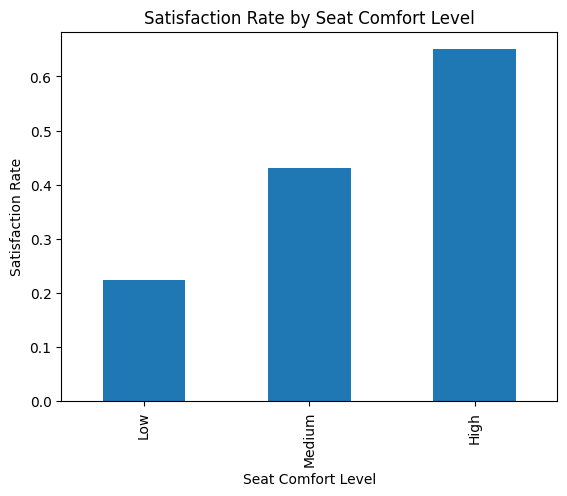

In [50]:
satisfaction_rate = (
    df_h7[df_h7["sat_bin"] == "Satisfied"]
    .groupby("seat_bucket")
    .size()
    / df_h7.groupby("seat_bucket").size()
)

satisfaction_rate.plot(kind="bar")
plt.title("Satisfaction Rate by Seat Comfort Level")
plt.ylabel("Satisfaction Rate")
plt.xlabel("Seat Comfort Level")
plt.show()


**Statistical conclusion**

Passenger satisfaction increases steadily with seat comfort level. However, the largest improvement occurs when moving from low to medium comfort, indicating diminishing returns at higher service levels.

**Business interpretation**

Improving poor seat comfort delivers the biggest gains in passenger satisfaction. While upgrades at already high comfort levels still help, they benefit fewer dissatisfied passengers and are likely more costly. This suggests airlines should prioritize fixing weak service areas before investing in premium enhancements.

In [51]:
#Testing for seat comfort 
df_h7_ie = df.copy()
df_h7_ie["ie_bucket"] = pd.cut(
    df_h7_ie["inflight_entertainment"],
    bins=[-1, 2, 4, 5],
    labels=["Low", "Medium", "High"]
)


In [52]:
df_h7_ie["sat_bin"] = (
    df_h7_ie["satisfaction"]
    .astype(str)
    .str.strip()
    .str.lower()
    .apply(lambda x: "Satisfied" if x == "satisfied" else "Not satisfied")
)


In [53]:
pd.crosstab(
    df_h7_ie["ie_bucket"],
    df_h7_ie["sat_bin"],
    normalize="index"
)


sat_bin,Not satisfied,Satisfied
ie_bucket,,
Low,0.817219,0.182781
Medium,0.522899,0.477101
High,0.351565,0.648435


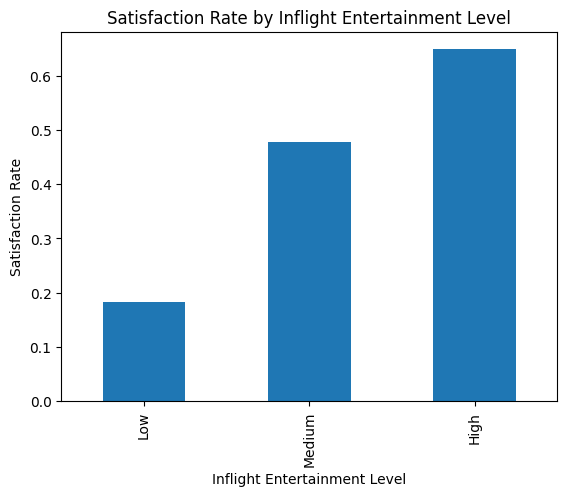

In [54]:
satisfaction_rate = (
    df_h7_ie[df_h7_ie["sat_bin"] == "Satisfied"]
    .groupby("ie_bucket")
    .size()
    / df_h7_ie.groupby("ie_bucket").size()
)

satisfaction_rate.plot(kind="bar")
plt.title("Satisfaction Rate by Inflight Entertainment Level")
plt.ylabel("Satisfaction Rate")
plt.xlabel("Inflight Entertainment Level")
plt.show()


**Statistical conclusion**

Passenger satisfaction increases with inflight entertainment quality, but the largest increase occurs when moving from low to medium levels, indicating diminishing returns at higher quality levels.

**Business interpretation**

Improving poor inflight entertainment produces the biggest gains in passenger satisfaction. While further upgrades at already high levels still improve satisfaction, they deliver smaller marginal benefits. This suggests airlines should prioritize fixing weak entertainment offerings before investing heavily in premium enhancements.